# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных 


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Для начала посмотрим на 10 случайных строчек в *data*, для этого воспользуемся методом *sample()*

In [6]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
406,1,69.50,69.5,Male,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
1354,63,108.75,6871.7,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
475,49,19.45,921.3,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
5237,6,44.70,276.5,Male,1,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),0
4707,6,69.80,377.85,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
893,8,75.00,658.1,Male,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
2504,5,49.20,216.9,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
551,71,24.45,1730.65,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
3656,45,87.25,3941.7,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,1
661,53,73.80,4003.85,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


Теперь проверим, есть ли в нашем датасете незаполненные значения (*nan*'ы), для этого будем использовать метод *isna()*

In [7]:
data.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

То что метод *isna()* ничего не показал еще не значит, что там нет пустых элементов, потому что возможно они обозначены пустой строчкой (' '), поэтому сначала заменим пустые строчки на *nan*'ы, а после этого проверим сколько *nan*'ов образовалось

In [8]:
data = data.replace(' ', np.nan)

In [ ]:
data.isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001704
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Оказалось, что у нас 9 пустых значений, которые нужно чем-нибудь заменить, я решил заменить их средними значениями в данном столбце, но для этого придется привести все к типу *float* (потому что изначально в столбце все типа *str*)

In [ ]:
from numpy import average

In [ ]:
average_value_TotalSpent = []

for i in range(len(data['TotalSpent'])):
    average_value_TotalSpent.append(float(data['TotalSpent'][i]))

average(average_value_TotalSpent)

2287.486160545248

Средним значением оказалось число 2287, поэтому заменим *nan*'ы на него

In [9]:
data = data.replace(np.nan, 2287) 

## Анализ данных 

Построим гистограмму для численных признаков, т.к. в нашем *Dataframe* колонка *TotalSpent* состоит из чисел, но эти числа представлены в виде типа данных *string*, то создадим массив, в котором будут записаны те же данные, но уже с типом *float*

In [ ]:
value_TotalSpent = []
for i in range(len(data['TotalSpent'])):
    value_TotalSpent.append(float(data['TotalSpent'][i]))

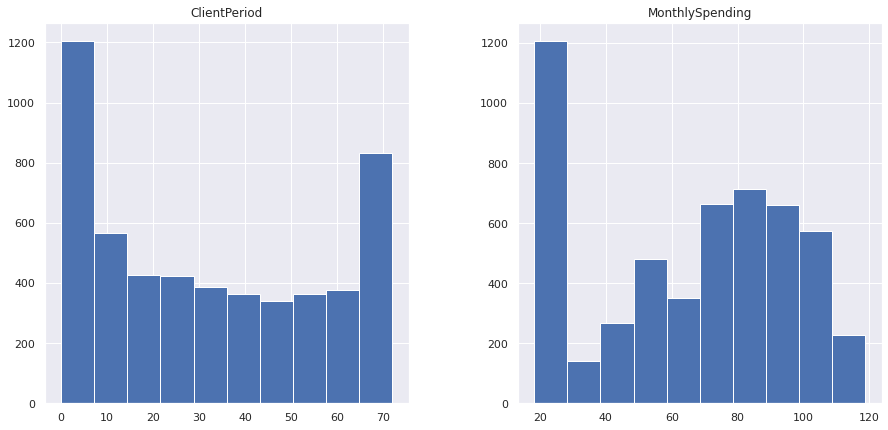

In [ ]:
data.hist(column=num_cols, figsize=(15, 7))
print('')

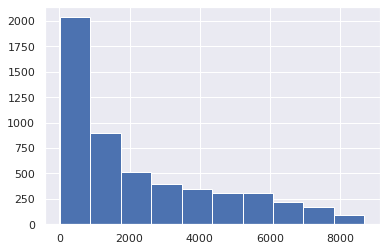

In [ ]:
plt.hist(value_TotalSpent)
print('')

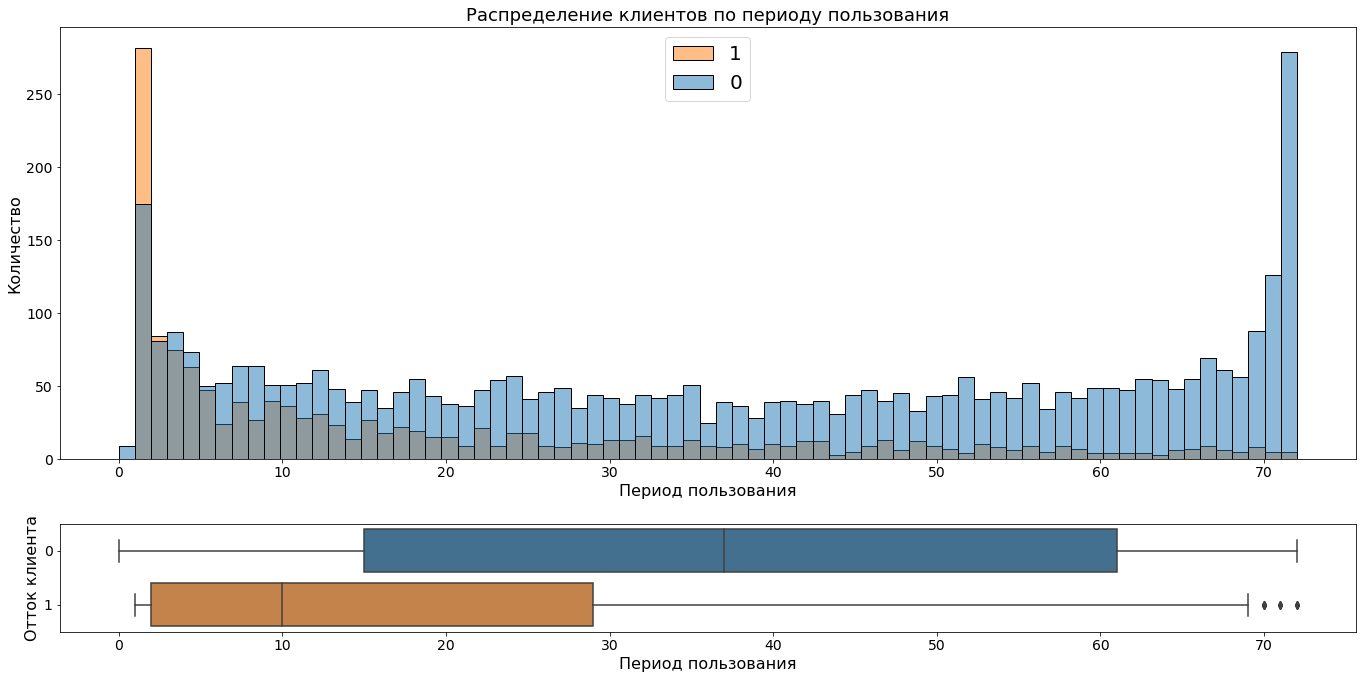

In [12]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_axes([0, 0.4, 1, 1])
plt.title('Распределение клиентов по периоду пользования', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['ClientPeriod'], hue=data['Churn'], bins=73)
plt.legend([1, 0], fontsize=20)
plt.ylabel('Количество', size=16)
plt.xlabel('Период пользования', size=16)
plt.yticks(size=14)
plt.xticks(size=14)

ax2 = fig.add_axes([0, 0, 1, 0.25])
sns.boxplot(y='Churn', x='ClientPeriod', data=data, orient='h', saturation=0.5)
plt.ylabel('Отток клиента', size=16)
plt.xlabel('Период пользования', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

Для категориальных признаков посчитаем значения каждого признака и составим гистограмму

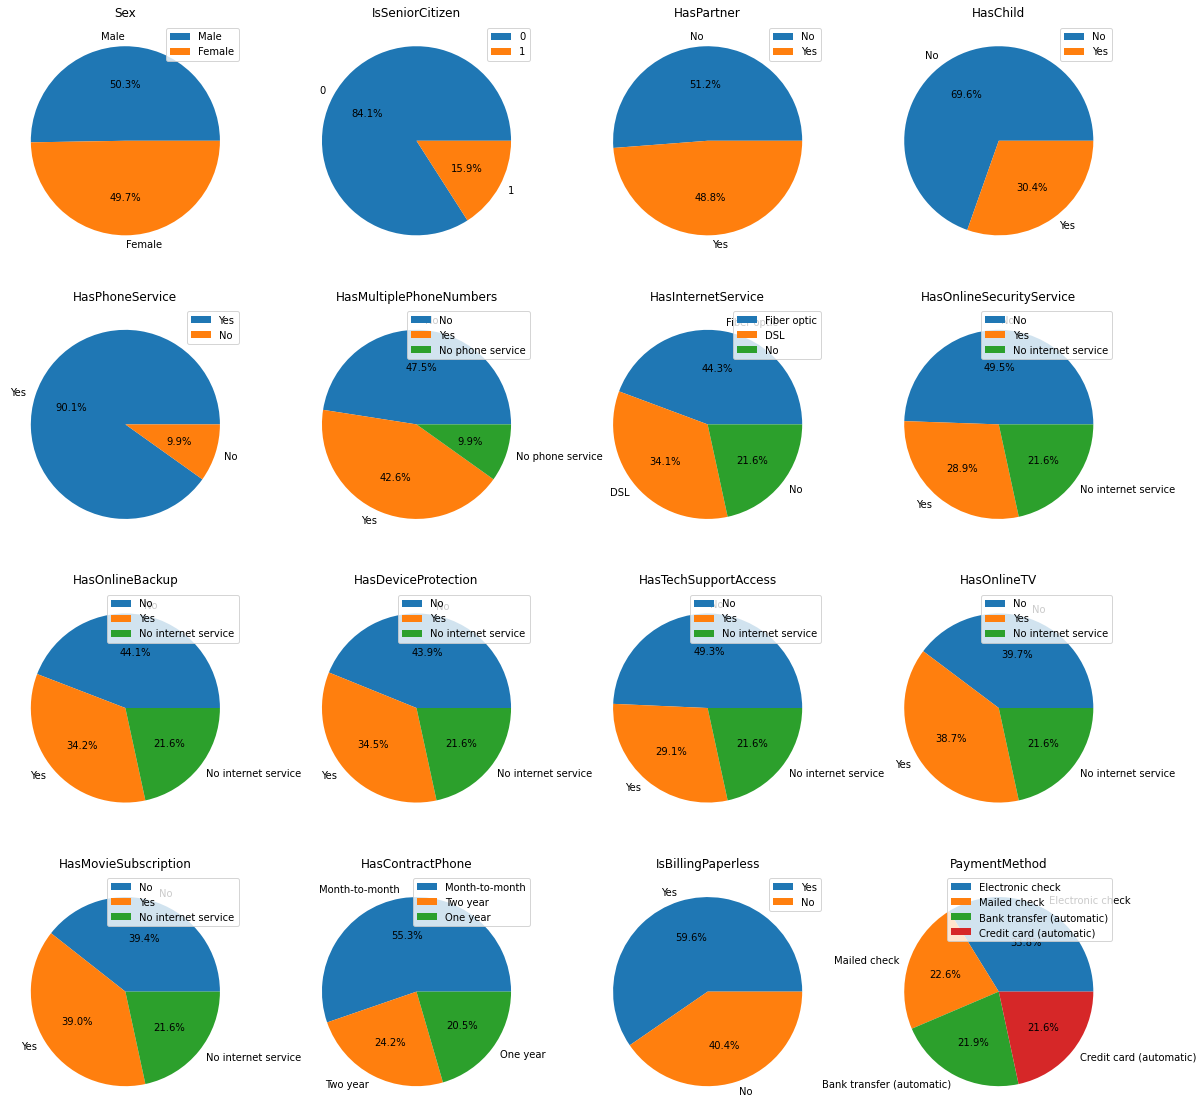

In [ ]:
figure = plt.figure(figsize =(20, 20)) #построим диаграммы для категориальных признаков
for i in range(len(cat_cols)):
    plt.subplot(4,4,i+1)
    plt.pie(data[cat_cols[i]].value_counts(), labels = data[cat_cols[i]].value_counts().index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
    plt.legend()

Построим распределение целевой переменной используя библиотеку *seaborn*, также для красоты посмотрим как выглядит столбец *mounthlySpending* через призму этой библиотеки. Также посмотрим на распределение целевой переменной.


In [11]:
import seaborn as sns

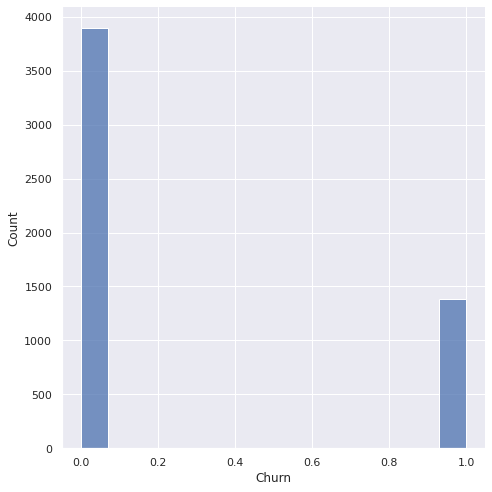

In [ ]:
sns.set_theme()
sns.displot(data = data[target_col], height = 7)

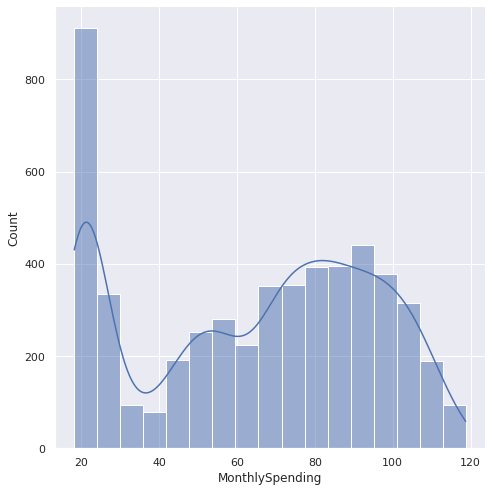

In [ ]:
sns.displot(data = data[num_cols[1]], height = 7, kde=True)

Значения целевой переменной различаются чуть меньше чем в 3 раза, поэтому можно сказать, что таргет, в целом, сбалансирован 

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

1) Отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'a. Создадим два массива Х и у, в одном будут признаки, в другом целевые переменные. Также разделим нашу выборку на train и valid

In [ ]:
categorical_indices = np.array([i for i in range(3,19)])
categorical_data = data[data.columns[categorical_indices]]
dummy_features = pd.get_dummies(categorical_data)



scaler = StandardScaler()

numeric_indices = np.array([i for i in range(0, 3)])
numeric_data = data[data.columns[numeric_indices]]

X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

# разделим выборку на тестовую и валидационную
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2) Обучим нашу нейросеть и построим график **ROC-AUC**

In [ ]:
model = LogisticRegressionCV(refit=True)
model.fit(X_train, y_train)

y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import  roc_curve

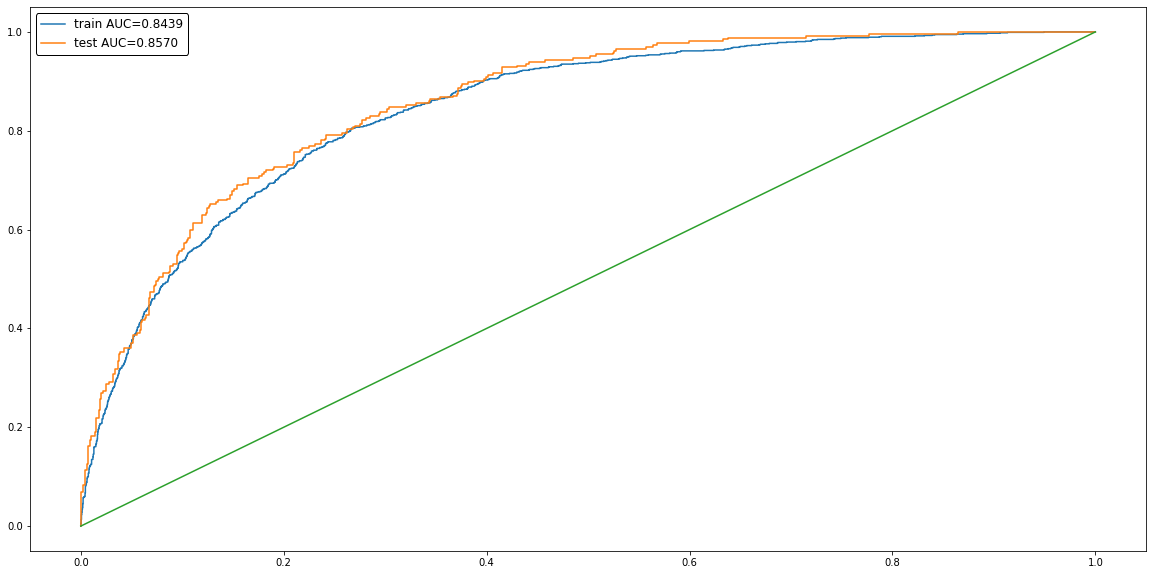

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Лучшее качество, которое у нас удалос получить на тестовой выборке *ROC-AUC* = 0.857

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 40 kB/s 


In [ ]:
import catboost

In [ ]:
df = data.replace(np.nan, 2287)

In [ ]:
df.replace('No internet service','No', inplace=True)

In [ ]:
X_cat = df[df.columns[[i for i in range(0, 19)]]]
y_cat = df[target_col]

1) Разделим выборку на *train/valid* и протестируем *catboost* со стандартными параметрами

In [ ]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_cat, y_cat, 
                                                       train_size=0.8)

In [ ]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)

In [ ]:
boosting_model.fit(X = X_cat,
                   y = y_cat,
                  #  plot=True,
                   verbose=False)

2) Протестируем разные значения параметров количества деревьев и *learning_rate*'а с помощью *GridSearchCV* (кросс-валидации) и выберем лучшую по метрике ROC-AUC комбинацию

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# зададим сетку вдоль которой будем искать оптимальные параметры

params = {}
params['iterations'] = np.arange(88,95,2)
params['learning_rate'] = np.arange(0.09,0.095,0.001)

# собственно наша модель

CV_model = GridSearchCV(estimator=boosting_model,
                       param_grid=params,
                       scoring='roc_auc',
                       cv=4,
                       verbose=2000,
                      )

# обучение
CV_model.fit(X_cat,y_cat,verbose=False)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4; 1/24] START iterations=88, learning_rate=0.09..........................
[CV 1/4; 1/24] END iterations=88, learning_rate=0.09;, score=0.854 total time=   1.0s
[CV 2/4; 1/24] START iterations=88, learning_rate=0.09..........................
[CV 2/4; 1/24] END iterations=88, learning_rate=0.09;, score=0.844 total time=   0.9s
[CV 3/4; 1/24] START iterations=88, learning_rate=0.09..........................
[CV 3/4; 1/24] END iterations=88, learning_rate=0.09;, score=0.844 total time=   0.7s
[CV 4/4; 1/24] START iterations=88, learning_rate=0.09..........................
[CV 4/4; 1/24] END iterations=88, learning_rate=0.09;, score=0.840 total time=   0.4s
[CV 1/4; 2/24] START iterations=88, learning_rate=0.091.........................
[CV 1/4; 2/24] END iterations=88, learning_rate=0.091;, score=0.855 total time=   0.4s
[CV 2/4; 2/24] START iterations=88, learning_rate=0.091.........................
[CV 2/4; 2/24] END ite

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f2dc49ed650>,
             param_grid={'iterations': array([88, 90, 92, 94]),
                         'learning_rate': array([0.09 , 0.091, 0.092, 0.093, 0.094, 0.095])},
             scoring='roc_auc', verbose=2000)

Посмотрим какой результат выдало дерево


In [ ]:
CV_model.best_params_

{'iterations': 90, 'learning_rate': 0.09000000000000001}

# Предсказания

{'iterations': 100, 'learning_rate': 0.1}

In [ ]:
best_model = CV_model

In [ ]:
X_end = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

# переведем TotalSpent в числовой формат
X_end['TotalSpent'] = pd.to_numeric(X_end['TotalSpent'], errors='coerce')
total_spent_nan_indexes = X_end[X_end['TotalSpent'].isnull()].index
X_end.iloc[total_spent_nan_indexes, X_end.columns.get_loc("TotalSpent")] = 0


submission['Churn'] = best_model.predict_proba(X_end)[:, 1]
X_end.replace('No internet service','No', inplace=True)


 # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index= False)



Скор на каггле получился **0.85223**

Имя на каггле - Gleb Shuldyakov


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

**0.85223**